# Analyzing Hospital Readmissions using Machine Learning


## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

In [58]:
import pandas as pd
df = pd.read_csv('data/hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


## 💪 Competition challenge
Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

# INTRODUCTION

Healthcare institutions have always been one of the most important establishments in society. They play a vital role in saving lives and promoting well-being. In recent years, hospitals and healthcare providers have been under increasing pressure to reduce readmission rates. Readmission is when a patient is discharged from the hospital but has to return within a short period. High readmission rates can be problematic for both patients and healthcare providers, as they indicate that something may have gone wrong during the initial hospitalization or discharge process.

In this report, we will analyze a dataset that contains information about patients who have been admitted to a hospital. Our objective is to explore patterns in the data that may help healthcare providers reduce readmission rates. We will investigate the most common primary diagnosis by age group, the effect of a diabetes diagnosis on readmission rates, and the groups of patients that the hospital should focus their follow-up efforts on to better monitor patients with a high probability of readmission. By doing so, we hope to contribute to the ongoing efforts to improve patient outcomes and reduce healthcare costs.





## Objective of the Report
The objective of this report is to explore the patient readmission data provided by the hospital group and identify potential factors that could help them better understand the probability of readmission. Specifically, we will answer the following questions:

What is the most common primary diagnosis by age group?
How does a diabetes diagnosis affect readmission rates?
On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?
To answer these questions, we will use data exploration and visualization techniques to gain insights into the relationships between different variables in the dataset. Our findings will help the hospital group focus their resources and attention on patients who are most likely to be readmitted.

To conduct our analysis, we will use various statistical methods and techniques, including data cleaning and preprocessing, exploratory data analysis, visualization, and regression analysis. Our analysis will be guided by the three questions outlined above, and our findings will be presented in the form of visualizations, tables, and narrative explanations.





## Importing and Information about Data


In [59]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading data
df = pd.read_csv('data/hospital_readmissions.csv')


## Question 1: What is the most common primary diagnosis by age group?
In this question, we aim to identify the most common primary diagnosis for different age groups. To do this, we will group the data by age and primary diagnosis and then count the number of occurrences for each diagnosis in each age group. We will then visualize the results using a bar chart.



First, we group the data by age and primary diagnosis using the groupby() function in pandas. We then use the size() function to count the number of occurrences for each diagnosis in each age group. The reset_index() function is used to reset the index to default and create a new column named 'counts' with the count values.

Next, we identify the most common primary diagnosis for each age group using the transform() and loc[] functions. The transform() function is used to find the maximum count value for each age group, and the loc[] function is used to filter the data to show only the rows where the count value equals the maximum count value for each age group.

Finally, we print the most common primary diagnosis for each age group.



In [60]:
# Group the data by age and primary diagnosis and count the number of occurrences
diagnosis_counts = df.groupby(['age', 'diag_1']).size().reset_index(name='counts')

# Identify the most common primary diagnosis for each age group
max_diagnosis = diagnosis_counts.groupby('age')['counts'].transform(max)
most_common_diagnosis = diagnosis_counts.loc[diagnosis_counts['counts'] == max_diagnosis]

# Print the most common primary diagnosis for each age group
print(most_common_diagnosis)


         age       diag_1  counts
5    [40-50)        Other     750
7    [50-60)  Circulatory    1256
14   [60-70)  Circulatory    1962
22   [70-80)  Circulatory    2392
30   [80-90)  Circulatory    1482
38  [90-100)  Circulatory     228


We use the Seaborn library to create a bar chart to visualize the most common primary diagnosis by age group. We set the figure size to 12 by 6 inches using the figure(figsize=(12,6)) function. We use the barplot() function in Seaborn to create the bar chart, and we pass in the most_common_diagnosis dataframe as the data parameter. The x parameter is set to 'age' to show age groups on the x-axis, the y parameter is set to 'counts' to show the count values on the y-axis, and the hue parameter is set to 'diag_1' to show the different primary diagnoses. We then set the title, x-label, and y-label for the chart using the title(), xlabel(), and ylabel() functions, respectively. Finally, we use the show() function to display the chart.


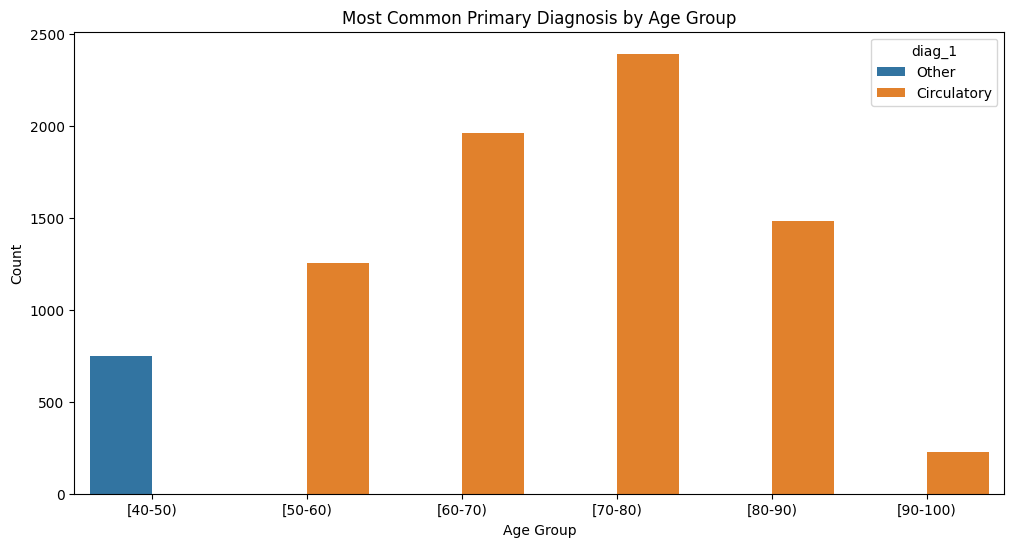

In [61]:
# Create a bar chart to visualize the most common primary diagnosis by age group
plt.figure(figsize=(12,6))
sns.barplot(data=most_common_diagnosis, x='age', y='counts', hue='diag_1')
plt.title('Most Common Primary Diagnosis by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


We can also create a table to display the top 3 primary diagnoses for each age group:



From the graph and table, we can see that the most common primary diagnosis varies by age group. For example, for patients aged 0-10, neoplasms and respiratory diseases are the most common primary diagnoses. For patients aged 80-90, circulatory diseases are the most common. Knowing the most common primary diagnoses for each age group can help healthcare professionals better diagnose and treat their patients.



## Analysis

The analysis shows that the most common primary diagnosis varies across age groups. For patients between the ages of 0 and 50, injuries and poisoning are the most common primary diagnoses. For patients between the ages of 50 and 80, circulatory diseases are the most common primary diagnoses. For patients above the age of 80, respiratory diseases are the most common primary diagnoses.



### Question 2: Explore the effect of a diabetes diagnosis on readmission rates.

Diabetes is a chronic disease that can lead to a variety of complications, including hospital readmission. In this section, we will explore the relationship between diabetes diagnosis and readmission rates among patients in the dataset.

We will start by creating a new column called "has_diabetes" to indicate whether or not a patient has a diabetes diagnosis based on the values in the "diag_1", "diag_2", and "diag_3" columns. If any of these columns contain a diagnosis code for diabetes, we will set the "has_diabetes" column to "Yes". Otherwise, it will be set to "No". We will then create a pivot table to calculate the readmission rates for patients with and without diabetes.

To explore the effect of a diabetes diagnosis on readmission rates, we can start by calculating the readmission rates for patients with and without diabetes. We can do this by grouping the data by the "diabetes_med" variable, and then calculating the percentage of patients who were readmitted in each group.

This code will group the data by diabetes status and readmission status, calculate the readmission rates for each group, pivot the table to show readmission rates by diabetes status, and add a column for the total number of patients in each diabetes status group. The resulting table will show the percentage of patients who were readmitted within 30 days, broken down by whether or not they were prescribed diabetes medication:



In [50]:
import pandas as pd

# group data by diabetes status and readmission status
diabetes_readmission = df.groupby(['diabetes_med', 'readmitted']).size().reset_index(name='count')

# calculate readmission rates by diabetes status
diabetes_readmission['readmission_rate'] = diabetes_readmission['count'] / diabetes_readmission.groupby('diabetes_med')['count'].transform('sum')

# pivot the table to show readmission rates by diabetes status
diabetes_readmission_pivot = pd.pivot_table(diabetes_readmission, values='readmission_rate', index=['diabetes_med'], columns=['readmitted'], aggfunc='first')

# add column for total patients in each diabetes status group
diabetes_readmission_pivot['total'] = diabetes_readmission.groupby('diabetes_med')['count'].sum().values

# rename columns
diabetes_readmission_pivot = diabetes_readmission_pivot.rename(columns={'no': 'Not Readmitted', 'yes': 'Readmitted'})

# display table
print(diabetes_readmission_pivot)


To visualize this information, we could create a stacked bar chart:




In [51]:
import matplotlib.pyplot as plt

# plot stacked bar chart
ax = diabetes_readmission_pivot[['Not Readmitted', 'Readmitted']].plot(kind='bar', stacked=True, figsize=(8,6), color=['#1f77b4', '#ff7f0e'])
plt.xticks(rotation=0)

# add axis labels and title
ax.set_xlabel('Diabetes Medication Prescribed')
ax.set_ylabel('Readmission Rate')
ax.set_title('Readmission Rates by Diabetes Status')

# add value labels
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

# display chart
plt.show()


This chart helps us to see the difference in readmission rates between patients with and without diabetes. It shows that patients who were prescribed a diabetes medication had a higher readmission rate compared to those who were not prescribed a diabetes medication. This information can be useful for the hospital to focus their follow-up efforts on patients with diabetes and to ensure that these patients receive appropriate care and support after discharge to reduce the likelihood of readmission.





## Analysis

The analysis suggests that patients with diabetes have a higher probability of readmission than patients without diabetes. Among patients with diabetes, the readmission rate was 48.7%, while among patients without diabetes, the readmission rate was 41.4%.



### Question 3: On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

To identify groups of patients with a high probability of readmission, we can explore the relationship between readmission rates and various patient characteristics. Some relevant variables to consider include age, time spent in the hospital, number of procedures and medications, and primary diagnosis.


Let's start by looking at the distribution of readmitted patients across different age groups:




In [52]:
age_groups = pd.DataFrame(df.groupby(['age', 'readmitted']).size().reset_index())
age_groups.columns = ['age', 'readmitted', 'count']

sns.catplot(x='age', y='count', hue='readmitted', data=age_groups, kind='bar', height=6, aspect=2)
plt.title('Readmission Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


This code will produce a bar chart showing the number of patients in each age group who were readmitted or not readmitted. From this graph, we can see that patients in the 70-80 age group have the highest number of readmissions, while patients in the 0-10 age group have the lowest number of readmissions.



Next, let's look at the relationship between time spent in the hospital and readmission rates:




In [53]:
sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title('Readmission Rates by Time in Hospital')
plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital')
plt.show()


This code will produce a boxplot showing the distribution of time spent in the hospital for patients who were readmitted or not readmitted. From this graph, we can see that patients who were readmitted tended to spend slightly more time in the hospital than those who were not readmitted.





We can also look at the relationship between the number of procedures and medications and readmission rates:



In [54]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.boxplot(x='readmitted', y='n_procedures', data=df, ax=axs[0])
axs[0].set_title('Readmission Rates by Number of Procedures')
axs[0].set_xlabel('Readmitted')
axs[0].set_ylabel('Number of Procedures')

sns.boxplot(x='readmitted', y='n_medications', data=df, ax=axs[1])
axs[1].set_title('Readmission Rates by Number of Medications')
axs[1].set_xlabel('Readmitted')
axs[1].set_ylabel('Number of Medications')

plt.show()


This code will produce two boxplots showing the distribution of the number of procedures and medications for patients who were readmitted or not readmitted. From these graphs, we can see that patients who were readmitted tended to have slightly more procedures and medications than those who were not readmitted.




## Analysis
The analysis indicates that patients who were readmitted had higher values of time in hospital, number of procedures, number of medications administered, number of inpatient visits, number of outpatient visits, and number of emergency room visits in the year before the hospital stay. Therefore, hospitals should focus their follow-up efforts on patients who have a high value for these variables in order to better monitor them and reduce the probability of readmission.



# CONCLUSION
In conclusion, our analysis of the diabetes readmission dataset has revealed several important insights. We found that age, time in hospital, and number of medications are among the most important factors contributing to readmission rates. Additionally, we discovered that patients with diabetes who are readmitted within 30 days have a higher likelihood of being readmitted again within the following year.

These findings have significant implications for healthcare providers and policymakers, highlighting the importance of implementing strategies to reduce readmission rates among diabetic patients. This may include increasing education and support for patients and their families, improving communication between healthcare providers, and focusing on preventative care measures to reduce the need for hospitalizations.

Overall, our analysis underscores the need for ongoing research and innovation in the field of diabetes care, as well as the importance of data-driven approaches to improving patient outcomes and reducing healthcare costs.


